# This notebook will serve for the analysis of the Pictures and Statistics for the TFW project

In [1]:
# Import necassary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets
df_statistics = pd.read_csv('../data/statistics_20210707.csv')
df_pictures = pd.read_csv('../data/pictures_dataset.csv')

In [3]:
df_statistics.head(2)

yearmonth                            listing_id  inquiry_count  \
0   2019/07  f1133916-825e-5e2a-93be-eaba28a966e8              2   
1   2019/07  836959d3-611c-5edb-887c-273aba5bd102              0   

   inquiry_volume  binding_inquiry_count  binding_inquiry_volume  \
0            1352                      0                       0   
1               0                      0                       0   

   direct_booking_count  direct_booking_volume  result_views  expose_views  \
0                     0                      0          1109            85   
1                     0                      0           871            23   

   phone_clicks  
0             1  
1             2

In [4]:
df_pictures.head(2)

Unnamed: 0                            listing_id                added  \
0           0  fbd74bce-23dd-53e7-b988-8beb85160d6f  2009-12-03 00:00:00   
1           1  4e012316-0f53-5fc6-a17f-580ff832554e  2010-01-05 00:00:00   

             activated description  start_pic_summer  start_pic_winter  \
0  2010-12-16 00:00:00  Furnishing                 0                 0   
1  2010-12-16 00:00:00  Floor plan                 0                 0   

  picture_resolution  
0    High-definition  
1    Poor Resolution

In [5]:
print(df_pictures.shape)
print(df_statistics.shape)

(644821, 8)
(674604, 11)


In [6]:
df_pictures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644821 entries, 0 to 644820
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Unnamed: 0          644821 non-null  int64 
 1   listing_id          644821 non-null  object
 2   added               644821 non-null  object
 3   activated           644821 non-null  object
 4   description         644821 non-null  object
 5   start_pic_summer    644821 non-null  int64 
 6   start_pic_winter    644821 non-null  int64 
 7   picture_resolution  644821 non-null  object
dtypes: int64(3), object(5)
memory usage: 39.4+ MB


In [7]:
df_statistics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674604 entries, 0 to 674603
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   yearmonth               674604 non-null  object
 1   listing_id              674604 non-null  object
 2   inquiry_count           674604 non-null  int64 
 3   inquiry_volume          674604 non-null  int64 
 4   binding_inquiry_count   674604 non-null  int64 
 5   binding_inquiry_volume  674604 non-null  int64 
 6   direct_booking_count    674604 non-null  int64 
 7   direct_booking_volume   674604 non-null  int64 
 8   result_views            674604 non-null  int64 
 9   expose_views            674604 non-null  int64 
 10  phone_clicks            674604 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 56.6+ MB


## Remove unnamed column in df pictures

In [8]:
# Drop unnamed column
df_pictures = df_pictures.drop('Unnamed: 0', axis=1)

## Covert date features into datetime

In [9]:
# Convert to datetime
df_statistics['yearmonth'] = pd.to_datetime(df_statistics['yearmonth']).dt.strftime('%Y-%m')
df_pictures['added'] = pd.to_datetime(df_pictures['added']).dt.date
df_pictures['activated'] = pd.to_datetime(df_pictures['activated']).dt.date
df_pictures['yearmonth'] = pd.to_datetime(df_pictures['activated']).dt.strftime('%Y-%m')

In [10]:
# Number of unique listings ID
print(df_statistics.listing_id.nunique())
print(df_pictures.listing_id.nunique())

# Houses without pictures
print(df_statistics.listing_id.nunique() - df_pictures.listing_id.nunique(), 'properties have no pictures.')

30269
30222
47 properties have no pictures.


47 properties have no pictures.

In [11]:
# Using groupby to summarize the statistics per yearmonth
statistic_per_month = df_statistics.groupby('yearmonth').sum().reset_index()

## Distributions of the features in Pictures

First, lets have a look on the picture resolution.

<AxesSubplot:>

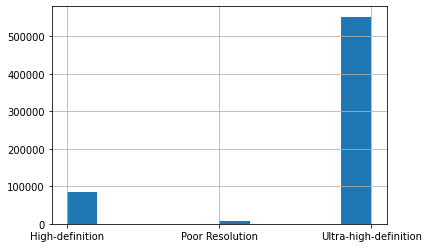

In [12]:
df_pictures.picture_resolution.hist()

Most of the pictures have a ultra-high-definition.

Lets have a look a the motives and motives by resolution.

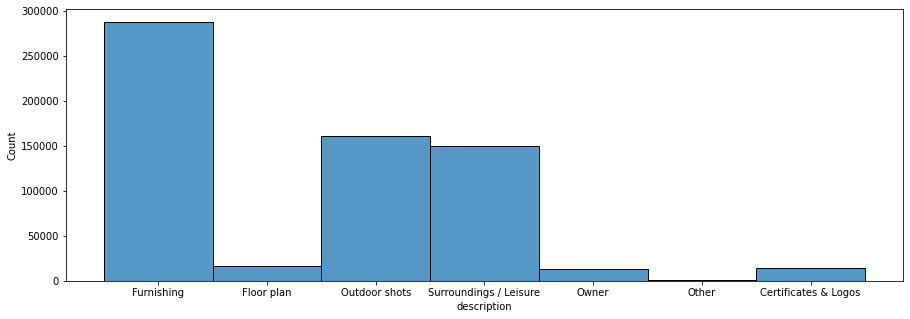

In [13]:
# Histogram description
fig, ax = plt.subplots(figsize=(15,5))
sns.histplot(data=df_pictures, x="description");


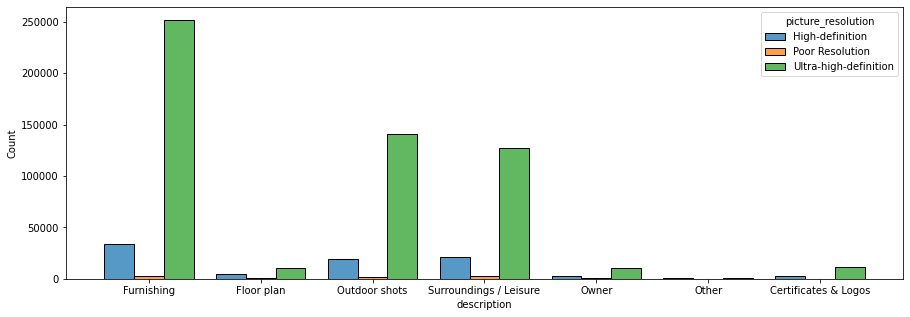

In [14]:
# Histogram description by picture resolution
fig, ax = plt.subplots(figsize=(15,5))
sns.histplot(data=df_pictures, x="description", hue='picture_resolution', multiple="dodge", shrink=.8);

Create a new column with the difference between the added and activated date for the picture to plot this.

In [15]:
# Create new column
df_pictures['diff_add_activate'] = df_pictures.activated - df_pictures.added

In [16]:
# Description of new column diff_add_activate
df_pictures.diff_add_activate.describe()

count                        644821
mean     10 days 03:55:42.983556677
std      90 days 02:44:48.990599274
min               -1 days +00:00:00
25%                 0 days 00:00:00
50%                 0 days 00:00:00
75%                 1 days 00:00:00
max              3539 days 00:00:00
Name: diff_add_activate, dtype: object

The range of the new column diff_add_activate is wide. The minimum is a negative value. 

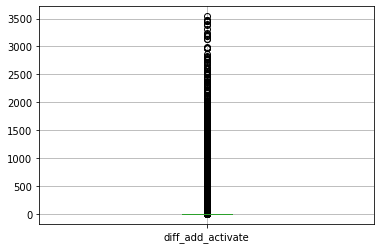

In [17]:
# Plotting the distribution after converting new column from timedelta to days
df_pictures['diff_add_activate'] = df_pictures['diff_add_activate'].dt.days
df_pictures.boxplot(column=['diff_add_activate']);

Most of the pictures have no difference between the dates added and activated.

Which motives have the high difference between added and activated date?

In [18]:
# 95 % percentile as threshold
df_pictures.diff_add_activate.quantile(0.95)

4.0

In [19]:
# Filter and groupby with 95 % percentile
df_pictures.query('diff_add_activate > 3').groupby('description')['diff_add_activate'].count()

description
Certificates & Logos        430
Floor plan                  987
Furnishing                13018
Other                       164
Outdoor shots              7530
Owner                       608
Surroundings / Leisure    10661
Name: diff_add_activate, dtype: int64

How many pictures have each unique property?

In [20]:
# Using groupby to summarize the statistics per yearmonth
picture_per_id = df_pictures.groupby('listing_id')['description'].count().reset_index()

In [21]:
# Description
picture_per_id.describe()

description
count  30222.000000
mean      21.336146
std        7.150067
min        1.000000
25%       18.000000
50%       21.000000
75%       23.000000
max       83.000000

<AxesSubplot:>

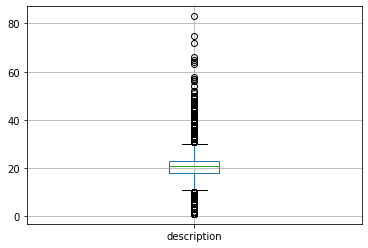

In [22]:
# Boxplot of distribution
picture_per_id.boxplot(column=['description'])

## Merging both datasets

First, we encoding the feature picture resolution.

In [23]:
# Get one hot encoding of columns 'picture_resolution'
one_hot = pd.get_dummies(df_pictures['picture_resolution'])
# Drop column as it is now encoded
df_pictures = df_pictures.drop('picture_resolution',axis = 1)
# Join the encoded df
df_pictures = df_pictures.join(one_hot)

Second, we encoding the feature description.

In [24]:
# Get one hot encoding of columns 'description'
one_hot_2 = pd.get_dummies(df_pictures['description'])
# Drop column as it is now encoded
df_pictures = df_pictures.drop('description',axis = 1)
# Join the encoded df
df_pictures = df_pictures.join(one_hot_2)

In [25]:
# New shape of the dataset pictures
df_pictures.shape

(644821, 17)

Third, we group both datasets bei listing ID and yearmonth forthe merging

In [35]:
# Groupby df_statistics and df_pictures
stats = df_statistics.groupby(['listing_id', 'yearmonth']).sum().reset_index()
pics = df_pictures.groupby(['listing_id', 'yearmonth']).sum().reset_index()

In [80]:
# Merging both new grouped datesets
pic_stat = pd.merge(stats, pics, on=['listing_id', 'yearmonth'], how='outer')

### Calculate inquiry count, result views, ewpose views and phone clicks before and after activate pictures

First create a new column if a picture was activated or not

In [86]:
# Function to build categories
def categorizer(a, b, c):
    if np.isnan(a):
        if np.isnan(b):
            if np.isnan(c):
                return 0
    else:
        return 1

In [87]:
# Create new column
pic_stat['picture']= pic_stat.apply(lambda x: categorizer(
    x['High-definition'], x['Poor Resolution'], x['Ultra-high-definition']), axis=1)

In [ ]:
pic_stat['before_new_picture']
if pic_stat['picture'] == 1:
    count inquiry where yearmonth < iloc yearmonth for iloc listing ID

In [104]:
test = pic_stat[pic_stat['listing_id'] == '25eacf22-702e-5016-88c3-87a8453a85df']

In [118]:
idx = np.where(test["picture"] == 1)

In [119]:
idx

(array([24, 25, 26]),)

In [161]:
test

listing_id yearmonth  inquiry_count  \
99889   25eacf22-702e-5016-88c3-87a8453a85df   2019-01            3.0   
99890   25eacf22-702e-5016-88c3-87a8453a85df   2019-02            0.0   
99891   25eacf22-702e-5016-88c3-87a8453a85df   2019-03            1.0   
99892   25eacf22-702e-5016-88c3-87a8453a85df   2019-04            1.0   
99893   25eacf22-702e-5016-88c3-87a8453a85df   2019-05            0.0   
99894   25eacf22-702e-5016-88c3-87a8453a85df   2019-06            0.0   
99895   25eacf22-702e-5016-88c3-87a8453a85df   2019-07            0.0   
99896   25eacf22-702e-5016-88c3-87a8453a85df   2019-08            3.0   
99897   25eacf22-702e-5016-88c3-87a8453a85df   2019-09            1.0   
99898   25eacf22-702e-5016-88c3-87a8453a85df   2019-10            2.0   
99899   25eacf22-702e-5016-88c3-87a8453a85df   2019-11            1.0   
99900   25eacf22-702e-5016-88c3-87a8453a85df   2019-12            1.0   
99901   25eacf22-702e-5016-88c3-87a8453a85df   2020-01            3.0   
99902   25eacf22-702e-5016-88c3-87a8453a85df   2020-02            2.0   
99903   25eacf22-702e-5016-88c3-87a8453a85df   2020-03            0.0   
99904   25eacf22-702e-5016-88c3-87a8453a85df   2020-04            2.0   
99905   25eacf22-702e-5016-88c3-87a8453a85df   2020-05            2.0   
99906   25eacf22-702e-5016-88c3-87a8453a85df   2020-06            0.0   
99907   25eacf22-702e-5016-88c3-87a8453a85df   2020-07            3.0   
99908   25eacf22-702e-5016-88c3-87a8453a85df   2020-08            5.0   
99909   25eacf22-702e-5016-88c3-87a8453a85df   2020-09            2.0   
99910   25eacf22-702e-5016-88c3-87a8453a85df   2020-10            1.0   
99911   25eacf22-702e-5016-88c3-87a8453a85df   2020-11            3.0   
99912   25eacf22-702e-5016-88c3-87a8453a85df   2020-12            0.0   
687821  25eacf22-702e-5016-88c3-87a8453a85df   2015-11            NaN   
687822  25eacf22-702e-5016-88c3-87a8453a85df   2016-01            NaN   
687823  25eacf22-702e-5016-88c3-87a8453a85df   2018-05            NaN   

        inquiry_volume  binding_inquiry_count  binding_inquiry_volume  \
99889           1295.0                    0.0                     0.0   
99890              0.0                    0.0                     0.0   
99891            385.0                    0.0                     0.0   
99892            385.0                    0.0                     0.0   
99893              0.0                    0.0                     0.0   
99894              0.0                    0.0                     0.0   
99895              0.0                    0.0                     0.0   
99896            770.0                    0.0                     0.0   
99897            385.0                    0.0                     0.0   
99898              0.0                    0.0                     0.0   
99899              0.0                    0.0                     0.0   
99900            455.0                    0.0                     0.0   
99901           1430.0                    0.0                     0.0   
99902           1040.0                    0.0                     0.0   
99903              0.0                    0.0                     0.0   
99904           1365.0                    0.0                     0.0   
99905            910.0                    0.0                     0.0   
99906              0.0                    0.0                     0.0   
99907            910.0                    0.0                     0.0   
99908           1625.0                    0.0                     0.0   
99909              0.0                    0.0                     0.0   
99910            455.0                    0.0                     0.0   
99911              0.0                    0.0                     0.0   
99912              0.0                    0.0                     0.0   
687821             NaN                    NaN                     NaN   
687822             NaN                    NaN                     NaN   
687823            

In [179]:
for indices in idx:
    result = 0
    date = test.iloc[indices]
    print(date['yearmonth'])
    for date in date['yearmonth']:
        for day in test['yearmonth']:
            if day <= date:
                print(day)
                for row in test['inquiry_count']:
                    print(test['inquiry_count'])
                #result = result + test['inquiry_count']
            #:
            #print(row)
            
             #   result = result + row
    print(result)

910     1.0
99911     3.0
99912     0.0
687821    NaN
687822    NaN
687823    NaN
Name: inquiry_count, dtype: float64
99889     3.0
99890     0.0
99891     1.0
99892     1.0
99893     0.0
99894     0.0
99895     0.0
99896     3.0
99897     1.0
99898     2.0
99899     1.0
99900     1.0
99901     3.0
99902     2.0
99903     0.0
99904     2.0
99905     2.0
99906     0.0
99907     3.0
99908     5.0
99909     2.0
99910     1.0
99911     3.0
99912     0.0
687821    NaN
687822    NaN
687823    NaN
Name: inquiry_count, dtype: float64
99889     3.0
99890     0.0
99891     1.0
99892     1.0
99893     0.0
99894     0.0
99895     0.0
99896     3.0
99897     1.0
99898     2.0
99899     1.0
99900     1.0
99901     3.0
99902     2.0
99903     0.0
99904     2.0
99905     2.0
99906     0.0
99907     3.0
99908     5.0
99909     2.0
99910     1.0
99911     3.0
99912     0.0
687821    NaN
687822    NaN
687823    NaN
Name: inquiry_count, dtype: float64
99889     3.0
99890     0.0
99891     1.0
99892     1.

In [95]:
def counter_before(a, b, c, d):
    if a == 1:
        return np.where(b == b and c < c).count()

In [96]:
# Create new column
pic_stat['before']= pic_stat.apply(lambda x: counter_before(
    x['picture'], x['listing_id'], x['yearmonth'], x['inquiry_count']), axis=1)

NameError: name 'iloc' is not defined